# <font color='Blue'>K-Means Cluster Analysis  </font>

- K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct groups or clusters.

#### <font color='magenta'>  </font>

#### <font color='magenta'>Key Concepts  </font>

- **Clusters**: Groups of data points that are more similar to each other than to those in other groups.
- **Centroids**: The center points of each cluster, which are used to represent the cluster.

#### <font color='magenta'>  </font>

#### <font color='magenta'>K-means Clustering Process  </font>

1.**Choose K**:

Decide how many clusters (K) you want. For example, if K=2, you will have 2 centroids. If K=4, you will have 4 centroids.

2.**Initialize Centroids**:

Randomly select K initial centroids from the dataset.

3.**Calculate Distances**:

For each data point, calculate the distance (Euclidean) to each of the K centroids.


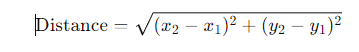

4.**Assign Clusters**:

For each data point, assign it to the cluster whose centroid is closest (i.e., has the smallest distance). This means you're assigning the point to the cluster associated with the centroid that is closest to it.

5.**Update Centroids**:

After all points have been assigned to clusters, recalculate the centroids of each cluster. This is done by taking the mean of all the points assigned to each cluster.

6.**Repeat**:

Repeat the distance calculations and cluster assignments until the centroids no longer change significantly (i.e., they stabilize) or until the assignments do not change.

- *The algorithm continues this process until the centroids remain the same or the distance to the centroids does not change significantly between iterations. At this point, the clustering is considered complete.*

#### <font color='magenta'>  </font>

#### <font color='magenta'>  </font>

**I'll take a example data and explain this steps**

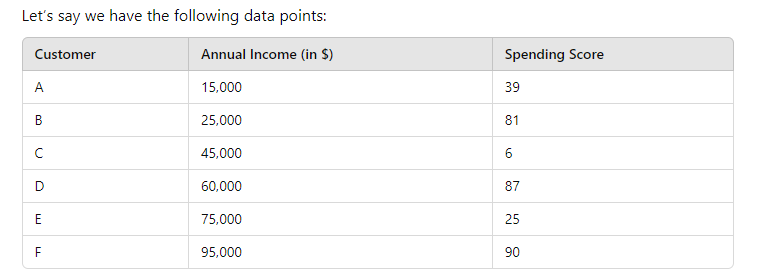

**Initial Setup**

Choose K: Let's set  𝐾=3

**Initial Centroids**:

C1: (20,000, 60)

C2: (45,000, 6)

C3: (76,667, 67.33)

**Customer Data Points**

Customer A: (15,000, 39)

Customer B: (25,000, 81)

Customer C: (45,000, 6)

Customer D: (60,000, 87)

Customer E: (75,000, 25)

Customer F: (95,000, 90)

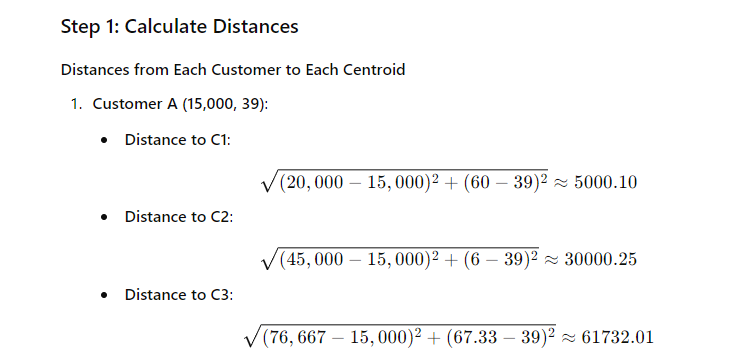

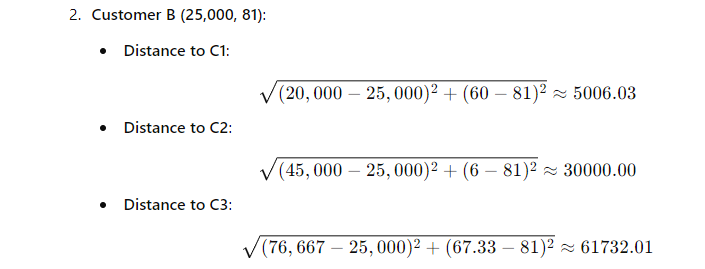

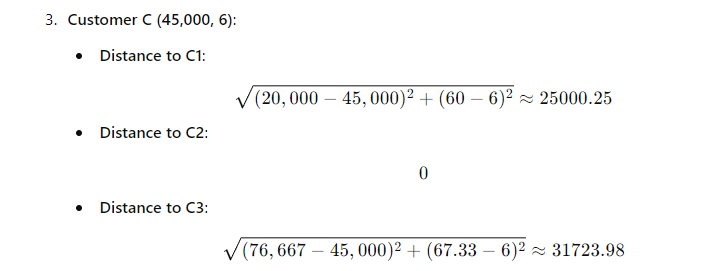

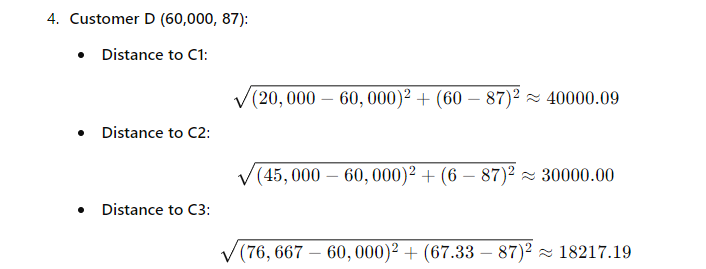

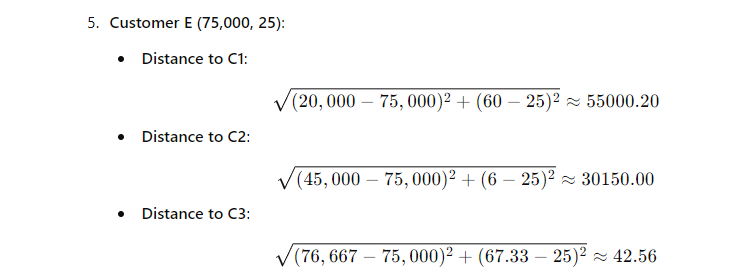

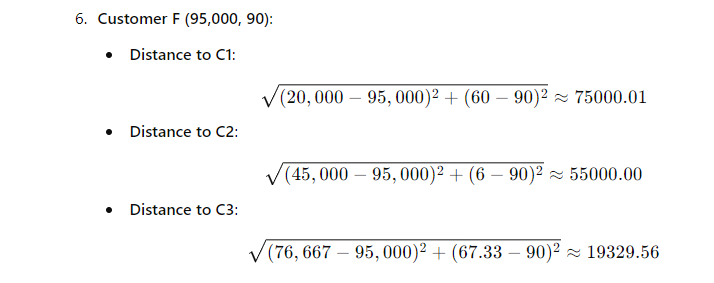

**Step 2 Assign Clusters**

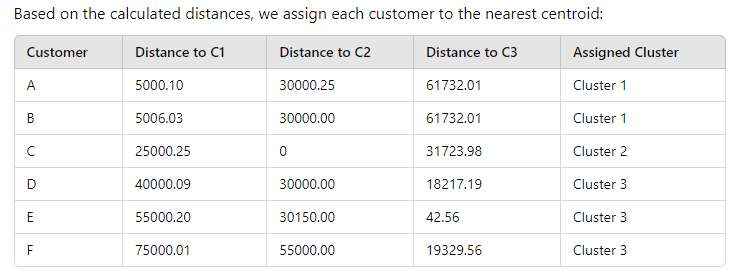

**Clusters After Assignment**

Cluster 1: Customers A, B

Cluster 2: Customer C

Cluster 3: Customers D, E, F

**Step 3: Update Centroids**

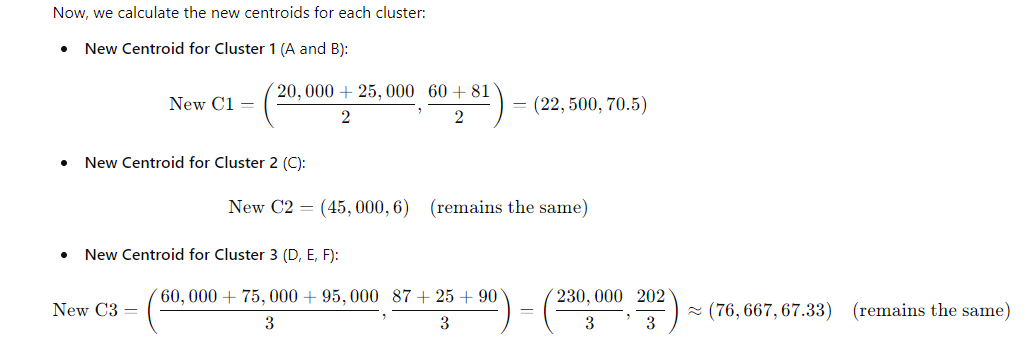

**Step 4: Repeat Until Centroids Stabilize**

Now we calculate distances again with the new centroids:

New C1: (22,500, 70.5)

C2: (45,000, 6)

C3: (76,667, 67.33)

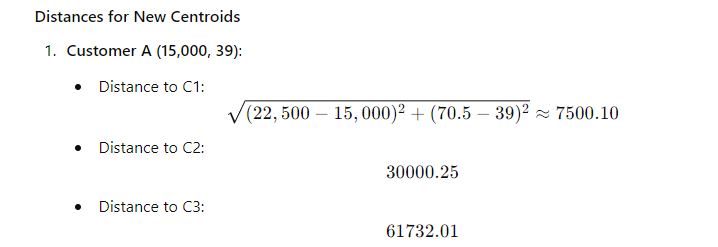

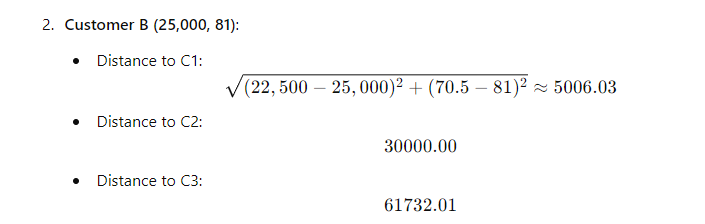

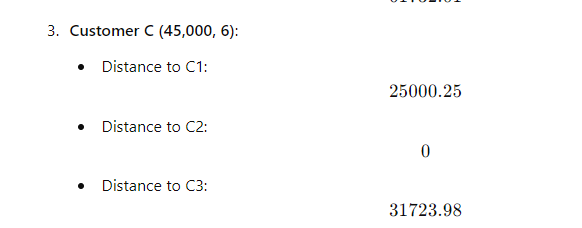

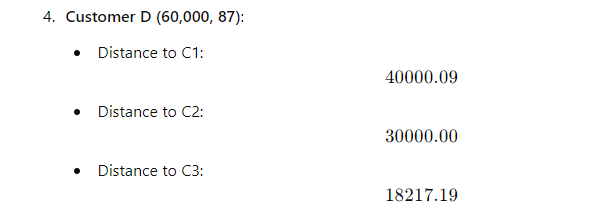

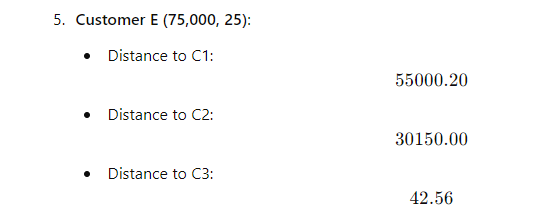

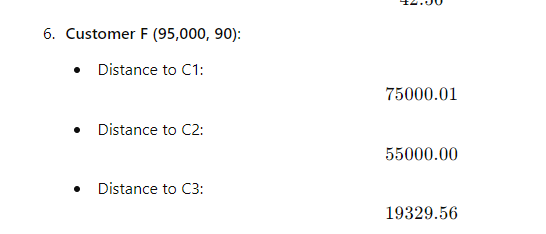

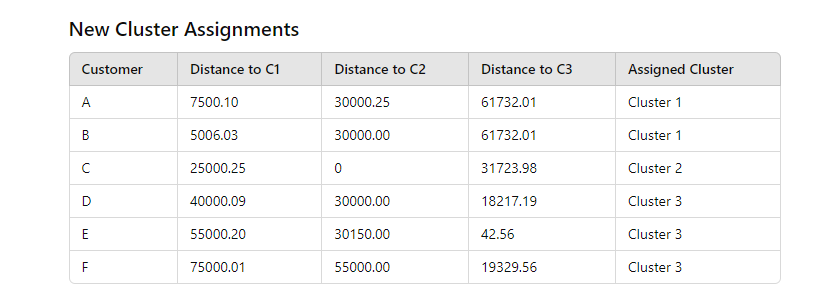

**Conclusion**

*After this iteration, the cluster assignments remain the same, and the centroids do not change significantly. Therefore, we can conclude that the algorithm has converd.*

**Final Cluster Assignments**

Cluster 1: Customers A, B

Cluster 2: Customer C

Cluster 3: Customers D, E, F

#### <font color='magenta'>  </font>

#### <font color='magenta'>  </font>

#### <font color='magenta'>  </font>

#### <font color='magenta'>  </font>

#### <font color='magenta'>  </font>

# <font color='red'>Model Deployment  </font>

#### <font color='magenta'>  </font>

#### <font color='magenta'>1.**Import Libraries**  </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### <font color='magenta'>  </font>

#### <font color='magenta'>2.**Loading the data set**  </font>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("D:/Sai/Data sets/Clustering/Mall_Customers.csv")  
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#### <font color='magenta'>  </font>

#### <font color='magenta'>3.**EDA**  </font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


It's time to create some data visualizations!

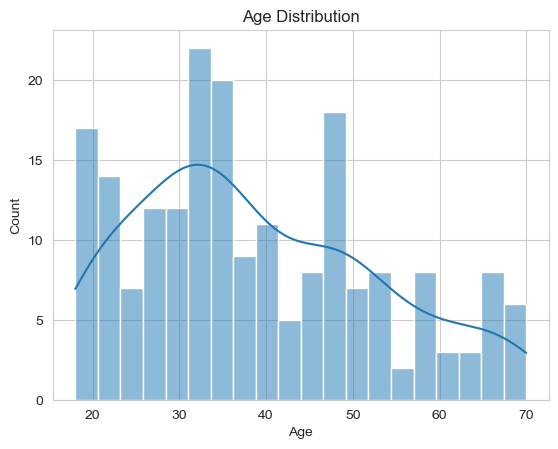

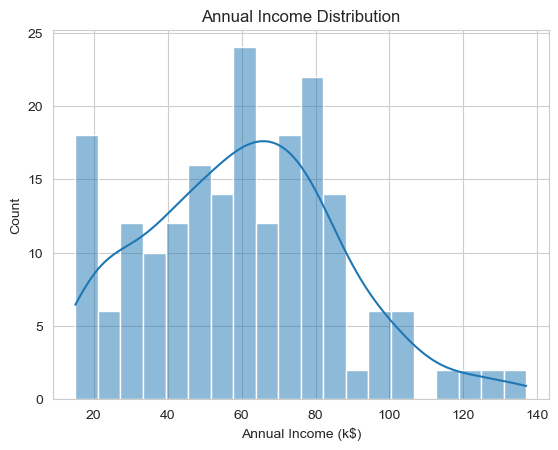

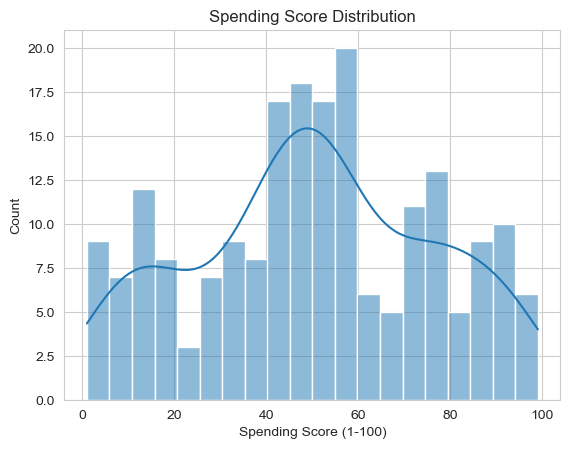

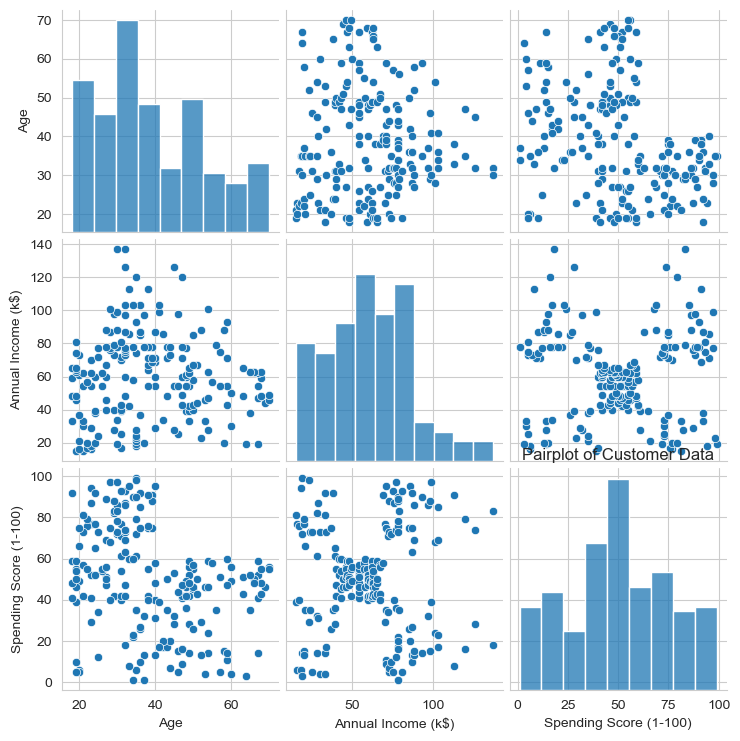

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Pairplot for relationships
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Pairplot of Customer Data')
plt.show()

#### <font color='magenta'>  </font>

#### <font color='magenta'>4.**K Means Cluster Creation**  </font>

Now it is time to create the Cluster labels!

 *Import KMeans from SciKit Learn.*

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=2)

In [25]:
kmeans.fit(data.drop('Gender',axis=1))

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[ 50.        ,  39.94949495,  39.34343434,  49.93939394],
       [150.        ,  37.77227723,  81.35643564,  50.45544554]])

#### <font color='magenta'>  </font>

#### <font color='magenta'>5.**Evaluation** </font>

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

 *Create a new column for data called 'Cluster'*

In [17]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [18]:
data['Cluster'] = data['CustomerID'].apply(converter)

In [21]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0
199,200,Male,30,137,83,0


#### <font color='magenta'>  </font>

#### <font color='magenta'>6.**Confusion matrix**  </font>

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],kmeans.labels_))
print(classification_report(data['Cluster'],kmeans.labels_))

[[ 99 101]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       200
           1       0.00      0.00      0.00         0

    accuracy                           0.49       200
   macro avg       0.50      0.25      0.33       200
weighted avg       1.00      0.49      0.66       200



#### <font color='magenta'>  </font>

#  <font color='red'>END.  </font>